In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness-report-2022/world-happiness-report-rankings-2022.csv
/kaggle/input/world-happiness-report-2022/Appendix_1_StatiscalAppendix_Ch2.pdf
/kaggle/input/world-happiness-report-2022/Appendix_6_Balance__Harmony.pdf
/kaggle/input/world-happiness-report-2022/Appendix_3_SupplementaryMaterials.pdf
/kaggle/input/world-happiness-report-2022/2022.csv


<h1><center><b>EDA of World Happiness 2022</b></center></h1>

***

EDA, stands for Exploratory Data Analysis, is a step in the process of Data Analysis. In this process of EDA we use different techniques to better understand the data we are going to work with.

For better understanding the data, along with

- Looking at the correlation between the variables, finding out the KPIs
- Identifying and dealing with missing data or outliers

We have to increase our understanding of the dataset and decrease the errors that we encounter, on our way.

EDA is responsible for 2 main things

- Cleaning up the dataset
- Giving us an overview of the relationship between the variables present

After conducting an EDA, a dataset is completely ready to be cleaned and use for visualizations and get further on with our Data Analysis process.

In [2]:
# loading and seeign the dataset

data=pd.read_csv('/kaggle/input/world-happiness-report-2022/2022.csv')
data.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [3]:
data.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.sample(5)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
107,108,Venezuela,"4,925","5,051","4,800","2,790","0,000","0,968","0,578","0,283","0,225","0,082"
59,60,Philippines,"5,904","6,007","5,800","2,283","1,268","0,912","0,514","0,678","0,107","0,142"
20,21,Bahrain,"6,647","6,779","6,514","2,092","1,854","1,029","0,625","0,693","0,199","0,155"
109,110,Iran,"4,888","4,995","4,780","1,427","1,410","0,741","0,642","0,281","0,241","0,146"


#### The dataset loaded, looks fine. 
#### Now let's see what all columns are present and if they are in the right and required format

In [5]:
# to see the column names

column_names=data.columns.tolist()

#### To make the column names in a similar format we would need to change the column names and remove spaces and special character from them, lets do it.

In [6]:
pip install skimpy

     |████████████████████████████████| 82 kB 230 kB/s            
     |████████████████████████████████| 214 kB 1.1 MB/s            
  Attempting uninstall: rich
    Found existing installation: rich 12.0.0
    Uninstalling rich-12.0.0:
      Successfully uninstalled rich-12.0.0
  Attempting uninstall: click
    Found existing installation: click 8.0.3
    Uninstalling click-8.0.3:
      Successfully uninstalled click-8.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.2.3 requires typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.1.1 which is incompatible.
featuretools 1.6.0 requires numpy>=1.21.0, but you have numpy 1.20.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from skimpy import clean_columns

In [8]:
columns=column_names
messy_data=pd.DataFrame(data=[],columns=column_names,index=[0])
clean_data=clean_columns(messy_data)
clean_data.columns.tolist()

['rank',
 'country',
 'happiness_score',
 'whisker_high',
 'whisker_low',
 'dystopia_1_83_residual',
 'explained_by_gdp_per_capita',
 'explained_by_social_support',
 'explained_by_healthy_life_expectancy',
 'explained_by_freedom_to_make_life_choices',
 'explained_by_generosity',
 'explained_by_perceptions_of_corruption']

In [9]:
import re

clean_data=[re.sub('explained_by_', '', s) for s in clean_data]
clean_data

['rank',
 'country',
 'happiness_score',
 'whisker_high',
 'whisker_low',
 'dystopia_1_83_residual',
 'gdp_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'freedom_to_make_life_choices',
 'generosity',
 'perceptions_of_corruption']

#### Now the column names looks good so we can put these names in the table.

In [10]:
data.columns=clean_data

In [11]:
data.head()

,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [12]:
data.shape

(147, 12)

#### This tells that there are 147 rows and 12 columns in our dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rank                          147 non-null    int64 
 1   country                       147 non-null    object
 2   happiness_score               146 non-null    object
 3   whisker_high                  146 non-null    object
 4   whisker_low                   146 non-null    object
 5   dystopia_1_83_residual        146 non-null    object
 6   gdp_per_capita                146 non-null    object
 7   social_support                146 non-null    object
 8   healthy_life_expectancy       146 non-null    object
 9   freedom_to_make_life_choices  146 non-null    object
 10  generosity                    146 non-null    object
 11  perceptions_of_corruption     146 non-null    object
dtypes: int64(1), object(11)
memory usage: 13.9+ KB


In [14]:
data.isnull().sum()

rank                            0
country                         0
happiness_score                 1
whisker_high                    1
whisker_low                     1
dystopia_1_83_residual          1
gdp_per_capita                  1
social_support                  1
healthy_life_expectancy         1
freedom_to_make_life_choices    1
generosity                      1
perceptions_of_corruption       1
dtype: int64

#### It looks like there's a row in the dataset where the rank and country name is present but, other scores and values are absent. If you've noticed when we ran 'data.tail()' command we got a row at the end with the rank as '147', country name as 'xx' and all other values as 'Nan'. That's not a useful row in the dataset so we'll remove it.

In [15]:
data.tail(1)

,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data = data.drop(data.index[-1])

In [17]:
data.tail()

,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
141,142,Botswana*,"3,471","3,667","3,275","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


#### We removed the last row and now there should not be any null rows present in the dataset.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rank                          146 non-null    int64 
 1   country                       146 non-null    object
 2   happiness_score               146 non-null    object
 3   whisker_high                  146 non-null    object
 4   whisker_low                   146 non-null    object
 5   dystopia_1_83_residual        146 non-null    object
 6   gdp_per_capita                146 non-null    object
 7   social_support                146 non-null    object
 8   healthy_life_expectancy       146 non-null    object
 9   freedom_to_make_life_choices  146 non-null    object
 10  generosity                    146 non-null    object
 11  perceptions_of_corruption     146 non-null    object
dtypes: int64(1), object(11)
memory usage: 14.8+ KB


In [19]:
data.isnull().sum()

rank                            0
country                         0
happiness_score                 0
whisker_high                    0
whisker_low                     0
dystopia_1_83_residual          0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [20]:
data.describe(include=object)

,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,146,146,146,146,146,146,146,146,146,146,146
unique,146,141,144,141,138,141,133,134,128,116,116
top,Finland,"4,516","6,535","5,659","1,895","1,815","0,865","0,803","0,448","0,089","0,077"
freq,1,2,2,2,2,3,3,2,3,4,4


In [21]:
## dublicates if present

data.duplicated().value_counts()

False    146
dtype: int64

In [22]:
## number of unique values present

data.nunique()

rank                            146
country                         146
happiness_score                 141
whisker_high                    144
whisker_low                     141
dystopia_1_83_residual          138
gdp_per_capita                  141
social_support                  133
healthy_life_expectancy         134
freedom_to_make_life_choices    128
generosity                      116
perceptions_of_corruption       116
dtype: int64

### What we can make from the dataset till now is...
* There are 146 rows and 12 columns.
* There was a null row problem that we dealt with, so now there's not null rows present.
* Only the 'Rank' row is of int type, all other rows are of object type.
* There is no duplicate value present as well.
* Simply by looking at the dataset, we can say Finland is the happiest country and Afghanistan is the least happy country.

***

### Cleaning The Dataset

Data Cleaning is removing incorrect, corrupted, wrongly formatted or incomplete data from the dataset

Steps for cleaning process I would follow here is:

1. Check for duplicates.
2. Remove duplicates.
3. Check for null values.
4. Remove the null values.
5. Filling up the null values with mean, median or mode. If the situation requires.

After this cleaning process, when we have our final data. Then we can proceed with making visualizations and inferences from the dataset

#### First let's make a copy of our dataset so that our original data stays alright.

In [23]:
data_1=data.copy()

In [24]:
data_1.head()

,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


#### As we already know that our dataset is free from Null values and Duplicate values.
#### The thing we have to take care of is to convert the columns with object time value to numeric value to see how the numeric value is contibuting to the output, that is the rank of the country.
#### Also our data, as it is not in integer type contains characters such as ',' which we would have to remove

In [25]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rank                          146 non-null    int64 
 1   country                       146 non-null    object
 2   happiness_score               146 non-null    object
 3   whisker_high                  146 non-null    object
 4   whisker_low                   146 non-null    object
 5   dystopia_1_83_residual        146 non-null    object
 6   gdp_per_capita                146 non-null    object
 7   social_support                146 non-null    object
 8   healthy_life_expectancy       146 non-null    object
 9   freedom_to_make_life_choices  146 non-null    object
 10  generosity                    146 non-null    object
 11  perceptions_of_corruption     146 non-null    object
dtypes: int64(1), object(11)
memory usage: 14.8+ KB


#### As we can see that there's only one int type value present, that is the rank, we have to change other values to int too. Leaving the country name.

In [26]:
## replcing the ',' with a null value basically
data_1["happiness_score"]=data_1["happiness_score"].str.replace(",","")
data_1["whisker_high"]=data_1["whisker_high"].str.replace(",","")
data_1["whisker_low"]=data_1["whisker_low"].str.replace(",","")
data_1["dystopia_1_83_residual"]=data_1["dystopia_1_83_residual"].str.replace(",","")
data_1["gdp_per_capita"]=data_1["gdp_per_capita"].str.replace(",","")
data_1["social_support"]=data_1["social_support"].str.replace(",","")
data_1["healthy_life_expectancy"]=data_1["healthy_life_expectancy"].str.replace(",","")
data_1["freedom_to_make_life_choices"]=data_1["freedom_to_make_life_choices"].str.replace(",","")
data_1["generosity"]=data_1["generosity"].str.replace(",","")
data_1["perceptions_of_corruption"]=data_1["perceptions_of_corruption"].str.replace(",","")

## there are some countries with a * along with their names, let's remove them for analysis purpose
data_1["country"]=data_1["country"].str.replace("*","")

data_1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7821,7886,7756,2518,1892,1258,0775,0736,0109,0534
1,2,Denmark,7636,7710,7563,2226,1953,1243,0777,0719,0188,0532
2,3,Iceland,7557,7651,7464,2320,1936,1320,0803,0718,0270,0191
3,4,Switzerland,7512,7586,7437,2153,2026,1226,0822,0677,0147,0461
4,5,Netherlands,7415,7471,7359,2137,1945,1206,0787,0651,0271,0419


In [27]:
#now let's change the data type to ineteger

data_1["happiness_score"] = pd.to_numeric(data_1["happiness_score"])
data_1["whisker_high"] = pd.to_numeric(data_1["whisker_high"])
data_1["perceptions_of_corruption"] = pd.to_numeric(data_1["perceptions_of_corruption"])
data_1["whisker_low"] = pd.to_numeric(data_1["whisker_low"])
data_1["dystopia_1_83_residual"] = pd.to_numeric(data_1["dystopia_1_83_residual"])
data_1["gdp_per_capita"] = pd.to_numeric(data_1["gdp_per_capita"])
data_1["social_support"] = pd.to_numeric(data_1["social_support"])
data_1["healthy_life_expectancy"] = pd.to_numeric(data_1["healthy_life_expectancy"])
data_1["freedom_to_make_life_choices"] = pd.to_numeric(data_1["freedom_to_make_life_choices"])
data_1["generosity"]= pd.to_numeric(data_1["generosity"])

In [28]:
data_1.head()

,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7821,7886,7756,2518,1892,1258,775,736,109,534
1,2,Denmark,7636,7710,7563,2226,1953,1243,777,719,188,532
2,3,Iceland,7557,7651,7464,2320,1936,1320,803,718,270,191
3,4,Switzerland,7512,7586,7437,2153,2026,1226,822,677,147,461
4,5,Netherlands,7415,7471,7359,2137,1945,1206,787,651,271,419


In [29]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   rank                          146 non-null    int64 
 1   country                       146 non-null    object
 2   happiness_score               146 non-null    int64 
 3   whisker_high                  146 non-null    int64 
 4   whisker_low                   146 non-null    int64 
 5   dystopia_1_83_residual        146 non-null    int64 
 6   gdp_per_capita                146 non-null    int64 
 7   social_support                146 non-null    int64 
 8   healthy_life_expectancy       146 non-null    int64 
 9   freedom_to_make_life_choices  146 non-null    int64 
 10  generosity                    146 non-null    int64 
 11  perceptions_of_corruption     146 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 14.8+ KB


#### Now all numeric values are in int format and only country is in object type format.

#### Now our data is ready. We can use it to make visulizations and inferences from the dataset.

***

### Data Visualization and Analysis

#### Data visualization is the representation of data through the use of different charts, plots and infographics. These visual displays of information communicate the relationship between the data along with some data insights in a way that is easy to understand.

Some of the Types of Visualization analysis are:

- Uni Variate analysis: This shows every observation/distribution in data on a single data variable. It can be shown with the help of various plots like Scatter Plot, Line plot, Histogram(summary)plot, box plots, violin plot, etc.
- Bi-Variate analysis: Bivariate analysis displays are done to reveal the relationship between two data variables. It can also be shown with the help of Scatter plots, histograms, Heat Maps, Box Plots, Violin Plots, etc.
- Multi-Variate analysis: Multivariate analysis, as the name suggests, displays are done to reveal the relationship between more than two data variables. Scatterplots, Histograms, box plots, violin plots can be used for Multivariate Analysis.

***

<AxesSubplot:>

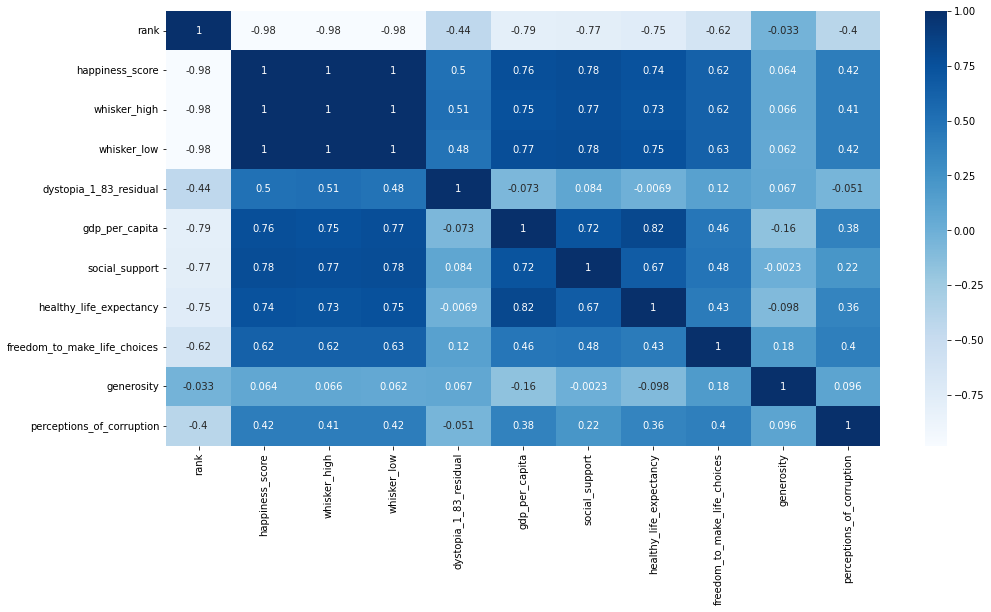

In [30]:
## To see the correlation between attributes
plt.figure(figsize=(16,8))
data_correlation = data_1.corr()
sns.heatmap(data_correlation, annot=True, cmap='Blues')

#### This correlation plots clearly shows that out of all the attributes present, GDP, Social Support, Life Expectancy, Generocity and Freedom to make choices are the ones with relate to the happiness score the most.

***

#### First let's look at the top 15 Happiest Countries

In [31]:
## top 10 happiest countries
top_15_countries = data_1.sort_values(by='happiness_score', ascending=False).head(15)
top_15_countries

,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7821,7886,7756,2518,1892,1258,775,736,109,534
1,2,Denmark,7636,7710,7563,2226,1953,1243,777,719,188,532
2,3,Iceland,7557,7651,7464,2320,1936,1320,803,718,270,191
3,4,Switzerland,7512,7586,7437,2153,2026,1226,822,677,147,461
4,5,Netherlands,7415,7471,7359,2137,1945,1206,787,651,271,419
5,6,Luxembourg,7404,7501,7307,2042,2209,1155,790,700,120,388
6,7,Sweden,7384,7454,7315,2003,1920,1204,803,724,218,512
7,8,Norway,7365,7440,7290,1925,1997,1239,786,728,217,474
8,9,Israel,7364,7426,7301,2634,1826,1221,818,568,155,143
9,10,New Zealand,7200,7279,7120,1954,1852,1235,752,680,245,483


In [32]:
print('The Top 15 Happiest Countries')
top_15_countries['country']

The Top 15 Happiest Countries


0         Finland
1         Denmark
2         Iceland
3     Switzerland
4     Netherlands
5      Luxembourg
6          Sweden
7          Norway
8          Israel
9     New Zealand
10        Austria
11      Australia
12        Ireland
13        Germany
14         Canada
Name: country, dtype: object

#### Happiness Score

In [33]:
fig= px.bar(top_15_countries, x= top_15_countries['country'], y=top_15_countries['happiness_score'].values, labels={'y':'Happiness Score'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#### GDP Per Capita

In [34]:
fig= px.bar(top_15_countries, x= top_15_countries['country'], y=top_15_countries['gdp_per_capita'].values, labels={'y':'GDP Per Capita'})
fig.show()

#### Social Support

In [35]:
fig= px.bar(top_15_countries, x= top_15_countries['country'], y=top_15_countries['social_support'].values, labels={'y':'Social Support'})
fig.show()

#### Healthy Life Expectancy

In [36]:
fig= px.bar(top_15_countries, x= top_15_countries['country'], y=top_15_countries['healthy_life_expectancy'].values, labels={'y':'Healthy Life Expectancy'})
fig.show()

####  Freedom To Make Life Choices

In [37]:
fig= px.bar(top_15_countries, x= top_15_countries['country'], y=top_15_countries['freedom_to_make_life_choices'].values, labels={'y':'Freedom to make life choices'})
fig.show()

#### Generosity

In [38]:
fig= px.bar(top_15_countries, x= top_15_countries['country'], y=top_15_countries['generosity'].values, labels={'y':'Generosity'})
fig.show()

####  Perceptions Of Corruption

In [39]:
fig= px.bar(top_15_countries, x= top_15_countries['country'], y=top_15_countries['perceptions_of_corruption'].values, labels={'y':'Perceptions Of Corruption'})
fig.show()

### We have seen how the measures like, GDP, Social Support, Life Expectancy, Corruption, Freedom to make choices and Generosity varies for the top 15 Happiest countries of the World.
#### And we can clearly see that Finland being the Happiest Country:
* Has the highest happiness score
* Has GPD growth less than many of the countries present in the TOP 15 happiest countries
* Has Social Support and Life Expectancy at a good level compared to other top countries present
* Has the highest score when it comes to Freedom to make choices
* Is at the lowest when it comes to Generosity score and Highest when we see the Corruption perception

***

#### Now let's look at the bottom 15 Happiest Countries

In [40]:
## top 15 least happiest countries
bottom_15_countries = data_1.sort_values(by='happiness_score', ascending=True).head(15)
bottom_15_countries

,rank,country,happiness_score,whisker_high,whisker_low,dystopia_1_83_residual,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
145,146,Afghanistan,2404,2469,2339,1263,758,0,289,0,89,5
144,145,Lebanon,2955,3049,2862,216,1392,498,631,103,82,34
143,144,Zimbabwe,2995,3110,2880,548,947,690,270,329,106,105
142,143,Rwanda,3268,3462,3074,536,785,133,462,621,187,544
141,142,Botswana,3471,3667,3275,187,1503,815,280,571,12,102
140,141,Lesotho,3512,3748,3276,1312,839,848,0,419,76,18
139,140,Sierra Leone,3574,3732,3416,1556,686,416,273,387,202,55
138,139,Tanzania,3702,3847,3558,735,848,597,425,578,248,270
137,138,Malawi,3750,3941,3560,1661,648,279,388,477,140,157
136,137,Zambia,3760,3902,3618,1135,930,577,306,525,203,83


In [41]:
print('The 15 Least Happiest Countries (Descending Order)')
bottom_15_countries['country']

The 15 Least Happiest Countries (Descending Order)


145     Afghanistan
144         Lebanon
143        Zimbabwe
142          Rwanda
141        Botswana
140         Lesotho
139    Sierra Leone
138        Tanzania
137          Malawi
136          Zambia
135           India
134            Togo
133          Jordan
132      Mauritania
131           Yemen
Name: country, dtype: object

#### Happiness Score

In [42]:
fig= px.bar(bottom_15_countries, x= bottom_15_countries['country'], y=bottom_15_countries['happiness_score'].values, labels={'y':'Happiness Score'})
fig.show()

#### GDP Per Capita

In [43]:
fig= px.bar(bottom_15_countries, x= bottom_15_countries['country'], y=bottom_15_countries['gdp_per_capita'].values, labels={'y':'GDP Per Capita'})
fig.show()

#### Social Support

In [44]:
fig= px.bar(bottom_15_countries, x= bottom_15_countries['country'], y=bottom_15_countries['social_support'].values, labels={'y':'Social Support'})
fig.show()

#### Healthy Life Expectancy

In [45]:
fig= px.bar(bottom_15_countries, x= bottom_15_countries['country'], y=bottom_15_countries['healthy_life_expectancy'].values, labels={'y':'Healthy Life Expectancy'})
fig.show()

####  Freedom To Make Life Choices

In [46]:
fig= px.bar(bottom_15_countries, x= bottom_15_countries['country'], y=bottom_15_countries['freedom_to_make_life_choices'].values, labels={'y':'Freedom to make life choices'})
fig.show()

#### Generosity

In [47]:
fig= px.bar(bottom_15_countries, x= bottom_15_countries['country'], y=bottom_15_countries['generosity'].values, labels={'y':'Generosity'})
fig.show()

####  Perceptions Of Corruption

In [48]:
fig= px.bar(bottom_15_countries, x= bottom_15_countries['country'], y=bottom_15_countries['perceptions_of_corruption'].values, labels={'y':'Perceptions Of Corruption'})
fig.show()

### We have seen how the measures like, GDP, Social Support, Life Expectancy, Corruption, Freedom to make choices and Generosity varies for the 15 Least Happiest countries of the World.
#### And we can clearly see that Afghanistan is the Least Happiest Country:
* Has the Lowest happiness score
* Has GPD growth, not the least but somewhere at the middle of the countries present in the Bottom 15 happiest countries
* Has The Least score when it comes to Social Support and Freedom to make choices, nearl equla to 0
* Has the Life Expectancy score at the lower end as well
* Is not at the lowest when it comes to Generosity score 
* When we see the Corruption perception, it's the least.

***

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='happiness_score'>

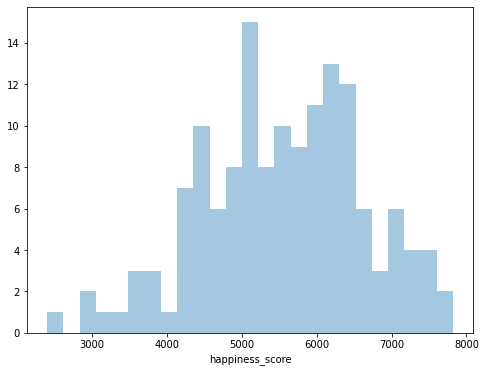

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(data_1['happiness_score'], kde=False, bins=25)

#### This gives us the idea that majority of the Countries has the happiness socre in the range of 4000-7000 

<AxesSubplot:xlabel='gdp_per_capita'>

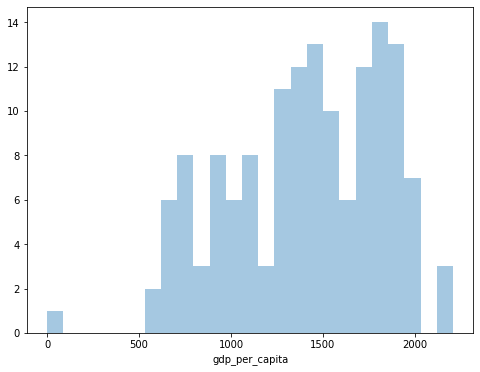

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(data_1['gdp_per_capita'], kde=False, bins=25)

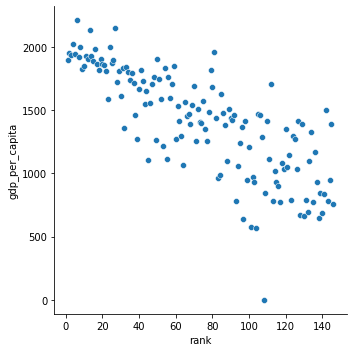

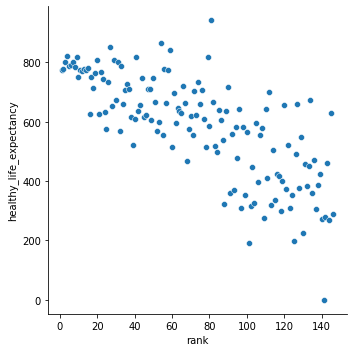

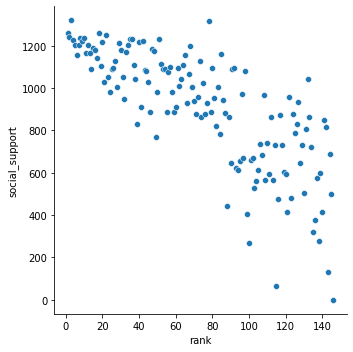

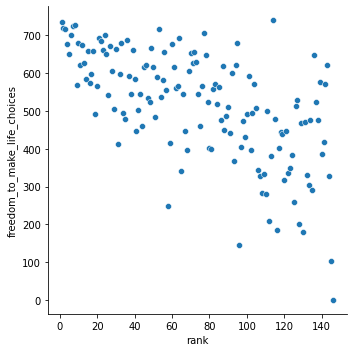

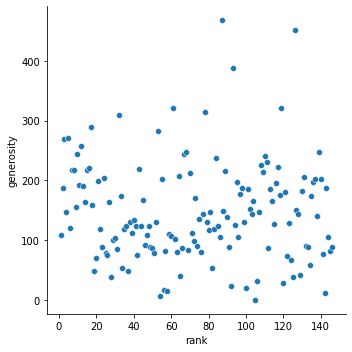

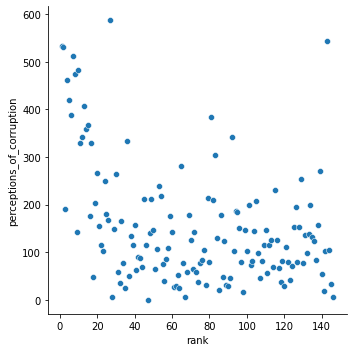

In [51]:
sns.relplot(x="rank", y="gdp_per_capita", data=data_1);
sns.relplot(x="rank", y="healthy_life_expectancy", data=data_1);
sns.relplot(x="rank", y="social_support", data=data_1);
sns.relplot(x="rank", y="freedom_to_make_life_choices", data=data_1);
sns.relplot(x="rank", y="generosity", data=data_1);
sns.relplot(x="rank", y="perceptions_of_corruption", data=data_1);

#### Well we can clearly see from the graph that as the rank increases the GDP of that country decreases, but there are some exceptions present.
#### Same is the case with Life Expectancy.
#### Social support also shows a downward going graph.
#### Freedom to make choices is on the upperside for most of the countries.
#### Whereas Generosity and Perception of corruption is on the lower side for majority of the Countries.

***

* These were all the points I wanted to mention about this dataset.
* Thank you for your time.
* If you guys have anything to add to it, do add. I would love to check it out.
* Give it a Like you find anything usefull from here, would be much appreciated.